In [1]:
import pandas as pd
pd.set_option('display.width', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn-bright','classic'])

from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


/tmp/ipykernel_43867/2173082959.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-bright','classic'])


## Exploration des données

### Aperçu des données

In [2]:
data = pd.read_csv('players_stats.csv')
data.head(15)

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,...,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384
5,Al Jefferson,65,1992,1082,486,1010,48.1,2,5,40.0,...,30.0,us,"January 4, 1985",NaN,10,205.0,C,CHA,130.05,30.945866
6,Alan Anderson,74,1744,545,195,440,44.3,73,210,34.8,...,33.0,us,"October 16, 1982",Michigan State University,5,195.0,SG,NJN,99.00,26.035503
7,Alec Burks,27,899,374,121,300,40.3,26,68,38.2,...,24.0,us,"July 20, 1991",University of Colorado,3,195.0,SG,UTA,96.30,25.325444
8,Alex Kirk,5,14,4,1,4,25.0,0,0,0.0,...,24.0,us,"November 14, 1991",University of New Mexico,R,210.0,C,CLE,110.25,25.000000
9,Alex Len,69,1518,432,179,353,50.7,1,3,33.3,...,22.0,ua,"June 16, 1993",University of Maryland,1,212.5,C,PHO,117.00,25.910035


#### On retire les valeurs manquantes

In [3]:
data = data.dropna()
data

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,...,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,Willie Green,52,951,306,118,306,38.6,42,121,34.7,...,34.0,us,"July 28, 1981",University of Detroit Mercy,11,190.0,SG,ORL,90.00,24.930748
484,Wilson Chandler,78,2471,1085,418,975,42.9,139,406,34.2,...,28.0,us,"May 10, 1987",DePaul University,7,200.0,SF,DEN,101.25,25.312500
485,Xavier Henry,9,86,20,3,13,23.1,0,0,0.0,...,24.0,be,"March 15, 1991",University of Kansas,4,195.0,SF,LAL,99.00,26.035503
486,Zach LaVine,77,1902,778,286,677,42.2,57,167,34.1,...,20.0,us,"March 10, 1995","University of California, Los Angeles",R,192.5,PG,MIN,85.05,22.951594


In [4]:
data["Pos"]

0      PG
1      PG
2      PF
3      PF
4       C
       ..
483    SG
484    SF
485    SF
486    PG
487    PF
Name: Pos, Length: 350, dtype: object

In [5]:
data["PosBin"] = data["Pos"].apply(lambda x: 0 if x in ["PG", "SG"] else 1)

In [6]:
data = data.drop(['Name','Birth_Place','Birthdate','Collage','Experience','Team','Pos'], axis=1)

In [7]:
data.columns

Index(['Games Played', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%',
       'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'EFF', 'AST/TOV', 'STL/TOV', 'Age', 'Height', 'Weight', 'BMI',
       'PosBin'],
      dtype='object')

In [8]:
X = data.drop('PosBin', axis=1)
y = data['PosBin']

In [9]:
subset = ['Games Played', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%',
       'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'EFF', 'AST/TOV', 'STL/TOV', 'Age', 'Height', 'Weight', 'BMI',
       'PosBin']
print(data[subset].head(5).to_latex())

\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrrrrrrrrr}
\toprule
{} &  Games Played &   MIN &   PTS &  FGM &  FGA &   FG\% &  3PM &  3PA &   3P\% &  FTM &  FTA &   FT\% &  OREB &  DREB &  REB &  AST &  STL &  BLK &  TOV &   PF &   EFF &  AST/TOV &  STL/TOV &   Age &  Height &  Weight &        BMI &  PosBin \\
\midrule
0 &            26 &   324 &   133 &   51 &  137 &  37.2 &   15 &   57 &  26.3 &   16 &   24 &  66.7 &     6 &    26 &   32 &   46 &    7 &    0 &   14 &   15 &   110 &     3.29 &     0.50 &  29.0 &   185.0 &   81.45 &  23.798393 &       0 \\
1 &            82 &  1885 &   954 &  344 &  817 &  42.1 &  121 &  313 &  38.7 &  145 &  174 &  83.3 &    32 &   134 &  166 &  261 &   54 &   15 &  157 &  189 &   791 &     1.66 &     0.34 &  30.0 &   180.0 &   72.45 &  22.361111 &       0 \\
2 &            47 &   797 &   243 &   93 &  208 &  44.7 &   13 &   48 &  27.1 &   44 &   61 &  72.1 &    46 &   123 &  169 &   33 &   21 &   22 &   38 &   83 &   318 &     0.87 &     0.55 &  20.0 &   202.5

/tmp/ipykernel_43867/468572285.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(data[subset].head(5).to_latex())


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 487
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Games Played  350 non-null    int64  
 1   MIN           350 non-null    int64  
 2   PTS           350 non-null    int64  
 3   FGM           350 non-null    int64  
 4   FGA           350 non-null    int64  
 5   FG%           350 non-null    float64
 6   3PM           350 non-null    int64  
 7   3PA           350 non-null    int64  
 8   3P%           350 non-null    float64
 9   FTM           350 non-null    int64  
 10  FTA           350 non-null    int64  
 11  FT%           350 non-null    float64
 12  OREB          350 non-null    int64  
 13  DREB          350 non-null    int64  
 14  REB           350 non-null    int64  
 15  AST           350 non-null    int64  
 16  STL           350 non-null    int64  
 17  BLK           350 non-null    int64  
 18  TOV           350 non-null    

In [11]:
data.isnull().sum() 

Games Played    0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3PM             0
3PA             0
3P%             0
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
PF              0
EFF             0
AST/TOV         0
STL/TOV         0
Age             0
Height          0
Weight          0
BMI             0
PosBin          0
dtype: int64

In [12]:
data.describe(include = 'all')

,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,TOV,PF,EFF,AST/TOV,STL/TOV,Age,Height,Weight,BMI,PosBin
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,...,350.000000,350.000000,350.00000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,52.517143,1207.868571,495.825714,185.117143,416.214286,42.562857,41.548571,117.894286,26.019429,84.042857,...,67.108571,99.580000,553.06000,1.522343,0.650800,27.320000,196.585714,98.821286,25.480802,0.562857
std,24.227160,835.251245,428.888777,157.370533,341.570395,9.008060,50.338643,131.781067,14.944837,91.581963,...,58.295706,65.125562,468.69517,0.831199,0.382874,4.138768,8.626262,12.284187,1.686314,0.496743
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-3.00000,0.000000,0.000000,20.000000,172.500000,72.450000,20.411523,0.000000
25%,33.000000,418.500000,135.250000,51.250000,124.000000,39.500000,1.000000,7.250000,17.975000,16.250000,...,20.250000,42.250000,155.00000,0.960000,0.410000,24.000000,190.000000,90.000000,24.305556,0.000000
50%,60.000000,1192.000000,397.500000,149.000000,349.000000,42.700000,19.000000,61.000000,31.400000,54.500000,...,52.000000,100.500000,472.00000,1.440000,0.570000,27.000000,197.500000,99.000000,25.532110,1.000000
75%,73.000000,1905.750000,779.000000,290.250000,655.500000,46.700000,67.750000,193.000000,36.175000,122.750000,...,99.000000,147.000000,827.75000,2.000000,0.845000,30.000000,202.500000,108.000000,26.530612,1.000000
max,82.000000,2981.000000,2217.000000,659.000000,1470.000000,85.700000,286.000000,646.000000,63.600000,715.000000,...,321.000000,285.000000,2202.00000,6.500000,3.000000,39.000000,222.500000,162.000000,32.723141,1.000000


In [13]:
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [16]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

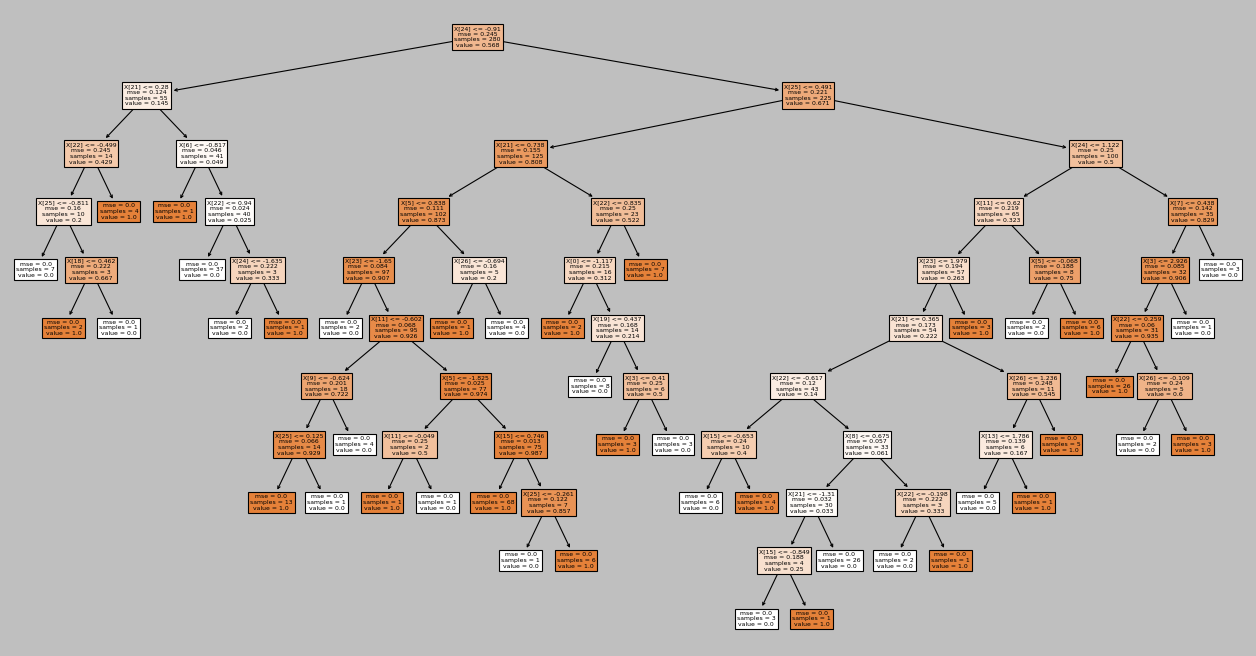

In [17]:
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True)
plt.show()